In [1]:
import pymaid
import navis as nv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import scipy.stats as stats
import scikit_posthocs as sp
import matplotlib.font_manager as font_manager

#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"<token>")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [2]:
def get_cable_overlap(OSNannotations, PN = None):
    # get the OSNs list
    OSNs = pymaid.get_skids_by_annotation(OSNannotations, allow_partial = False, intersect = True)
    # Get the neurons
    neurons = pymaid.get_neuron(OSNs)

    if PN == None:
        cable_overlap = nv.cable_overlap(neurons, neurons, dist= "2 microns")
        return cable_overlap
    
    else:
        PN = pymaid.get_neuron(PN)
        PN_cable_overlap = nv.cable_overlap(neurons, PN, dist= "2 microns")
        
        return PN_cable_overlap
    
def recurrent_synapses(OSNid, allOSNs):
    # Finds the number of recurrent synapses between an OSN and a list of OSNs.
    total_recurrent = pymaid.adjacency_matrix(sources=OSNid, targets=allOSNs)
    return total_recurrent

def sum_of_all_recurrent(allOSNs):
    # given an OSN list, finds the sum of all recurrent synapses between those OSNs.
    finaldict = {}
    for i in allOSNs:
        finaldict[i] = recurrent_synapses(i, allOSNs)
    return finaldict

def recurrent_analysis(OSNannotations):
    finaldf = pd.DataFrame()
    OSNs = pymaid.get_skids_by_annotation(OSNannotations, allow_partial = False, intersect = True)
    
    for i in OSNs:
        # a: get cable overlap from one OSN to all its postsynaptic partners in OSNs
        cable_overlap = pd.DataFrame(get_cable_overlap(OSNannotations)[str(i)])
        
        # b: get synapses between one OSN and all its postsynaptic partners in OSNs
        rec_synapses = recurrent_synapses(i, OSNs).transpose()
        
        # c: divide b by a
        final = rec_synapses.div(list(cable_overlap[str(i)]), axis=0)
        finaldf[str(i)] = final
        
    # return a dataframe with sum along row axis
    return pd.DataFrame(finaldf.sum(axis=1)).transpose()

In [3]:
MD1annotations = ['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done']

MD1Recurrent = recurrent_analysis(MD1annotations)

meep=MD1Recurrent.iloc[0].tolist()
MD1list=[i * 1000 for i in meep]
MD1list

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

[0.5939621295957777,
 0.543815434967424,
 0.4531074558802996,
 0.31424125447602796,
 0.5069791605332359,
 0.47201533933453527,
 0.5212244517911104,
 0.5087942579053671,
 0.539418676474604,
 0.5229259354353509]

In [4]:
MD2annotations = ['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done']

MD2Recurrent = recurrent_analysis(MD2annotations)

meep=MD2Recurrent.iloc[0].tolist()
MD2list=[i * 1000 for i in meep]
MD2list

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

[0.2516407949821137,
 0.11643939081414008,
 0.37277743017956483,
 0.07788203929325194,
 0.19005383268973225,
 0.2020289727226141,
 0.06582993389832059,
 0.13848590126850638,
 0.27192539998716,
 0.12417405975795061]

In [5]:
MD3annotations = ['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done']

MD3Recurrent = recurrent_analysis(MD3annotations)

meep=MD3Recurrent.iloc[0].tolist()
MD3list=[i * 1000 for i in meep]
MD3list

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

[0.5650140259524727,
 0.5159098103529937,
 0.24970919263204902,
 0.24033213746560408,
 0.3349868978173979,
 0.5518406647933225,
 0.5542600673987786,
 0.24521209091127852,
 0.33924747474297495,
 0.4445845736345981]

In [6]:
#make dataframe

data_dict = {"1": MD1list, "2": MD2list, "3": MD3list}
pre_df = {"Glomerulus": [], "Outgoing OSN→OSN synapses per micron of cable overlap": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["Outgoing OSN→OSN synapses per micron of cable overlap"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,Outgoing OSN→OSN synapses per micron of cable overlap
0,1,0.593962
1,1,0.543815
2,1,0.453107
3,1,0.314241
4,1,0.506979
5,1,0.472015
6,1,0.521224
7,1,0.508794
8,1,0.539419
9,1,0.522926


In [7]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


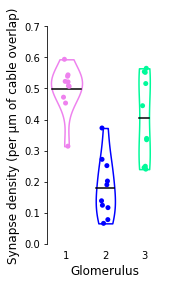

In [8]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "Outgoing OSN→OSN synapses per micron of cable overlap"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Synapse density (per µm of cable overlap)', size=12, fontname="Liberation Sans")
ax.set_aspect(8)
plt.ylim(0,0.7)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)

plt.savefig('../svg/recurrent_synapsespermicrontotal.svg', format="svg")
plt.show()

In [9]:
kruskal=stats.kruskal(MD1list, MD2list, MD3list)
print(kruskal)

KruskalResult(statistic=16.020645161290332, pvalue=0.0003320175992561199)


In [10]:
sp.posthoc_dunn([MD1list, MD2list, MD3list], p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000339,0.928887
2,0.000339,1.000000,0.013332
3,0.928887,0.013332,1.000000
